# PROJECT DATA MINING- AIRBNB

link of Database :https://www.kaggle.com/brittabettendorf/berlin-airbnb-data

email assistance Ettore Ritacco : ettore.ritacco@icar.cnr.it


email principal prof Pasquale Rullo : rullo@mat.unical.it


# Business Understanding
## Determine Business Objectives
### Background 

In this project, we are a private individual who owns an apartment located in the city of Berlin and we often go on trips and we want to be able to make the purchase of the house profitable.

### Business Objectives 

The objective of our business is to rent our Berlin apartments using airBNB.

### Business Success criteria

Success will depend on finding a price and frequency of visits that will maximize our profits when we leave.

## Assess situation 
### Inventory of ressources 

we have an apartment of 2 bedrooms, 4 beds, 1 bathroom, wifi, kitchen, microwave oven,3 accomodates, distance of center 3.52234
amenities = 5
requires_license = 1
instant_bookable = 1
guests_included = 1
extra_people = 10
require_guest_phone_verification = 0
bathrooms = 1
bedrooms = 2
beds = 4
accomodates = 3
host_total_listings_count = 4
host_has_profile_pic  = 1
host_identity_verified = 1
is_location_exact = 1
host_is_superhost = 1
minimum_nights = 2
cancellation = "cancellation_policy_moderate"
bed_type = "bed_type_Real Bed"
property_type = "property_type_Apartment"
room_type = "room_type_Entire home/apt"
distance =3.52234

### Requirements Assumptions & constraints
it will be assumed that the individual cannot rent his house all year round. he lives in it, so we will have to try to maximize the period when he will be able to rent his apartment. 


### Risk and Contingencies 

The risks are to make our apartment too expensive and therefore not to rent it. There is also the price of real property which often moves so it is necessary to know how to adapt (for example since the crisis of covid-19, there is a strong chance that the price of an airbnb are less expensive so using the data before covid is less interesting).

### Terminology 

### Costs and Benefits

## Determine Data Mining Goals
### Data Mining Goals

The objective of Data Mining is to propose a rental price of the apartment per month in order to be almost sure that it will be rented.

### Data Mining Success Criteria

Success will be measured by the margin of error between the prediction of the price and its true value.

## Produce Project Plan  
### Project plan 

* Data Understanding
    * collect intial Data
    * Describe Data 
        * Data Description Report  
        * listing
    * Explore Data 
        * Data Exploration Report



### Initial Assessment of tools, and techniques

We are going to use a SVM that will predict the price we should put for our apartment based on the data we have.

# Data Understanding 

## Collect initial Data 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

to help us in our analysis we have 6 databases on Airbnb:
* calendar_summary.csv
* listings.csv
* listings_summary.csv
* neighbourhoods.csv
* review.csv
* reviews_summary.csv

## Describe Data 
### Data Description Report  
#### listing


This database contains the first information that can be found for each possible reservation proposal.

This database is a part of the listing_summary database. 




In [2]:
# read 
listing = pd.read_csv("../data/listings.csv", delimiter = ',')
# checking shape
print("The dataset listing has {} rows and {} columns.".format(*listing.shape))

# check the columns we currently have
print("columns of database: {}".format(listing.columns))

The dataset listing has 22552 rows and 16 columns.
columns of database: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


#### listing_summary 



In this database you will find all the information related to the booking proposal. 

Each id represents a possible reservation with all its information.

In [3]:
listing_summary = pd.read_csv("../data/listings_summary.csv", delimiter = ',')
# checking shape
print("The dataset listing_summary has {} rows and {} columns.".format(*listing_summary.shape))

# check the columns we currently have
print("columns of database: {}".format(listing_summary.columns))

The dataset listing_summary has 22552 rows and 96 columns.
columns of database: Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_lo

There is an enormous amount of information that is not useful to us and therefore will be removed in the following sections.

#### calendar_summary
Each line represents a reservation with a date, the availability of the property and the rental price at that date.

In [4]:
calendar_summary = pd.read_csv("../data/calendar_summary.csv", delimiter = ',')
# checking shape
print("The dataset calendar_summary has {} rows and {} columns.".format(*calendar_summary.shape))

# check the columns we currently have
print("columns of database: {}".format(calendar_summary.columns))
calendar_summary.head(2)

The dataset calendar_summary has 8231480 rows and 4 columns.
columns of database: Index(['listing_id', 'date', 'available', 'price'], dtype='object')


,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN


#### neighbourhoods



This database contains all the districts and neighbourhoods that make up Berlin, the neighbourhood information of each reservation is given in the variables 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed' of the listing_summary database, so it will not be necessary to keep this neighbourhoods database for the next analyses. 

In [5]:
neighbourhoods  = pd.read_csv("../data/neighbourhoods.csv", delimiter = ',')
# checking shape
print("The dataset neighbourhoods has {} rows and {} columns.".format(*neighbourhoods.shape))

# check the columns we currently have
print("columns of database: {}".format(neighbourhoods.columns))
neighbourhoods.head(2)

The dataset neighbourhoods has 139 rows and 2 columns.
columns of database: Index(['neighbourhood_group', 'neighbourhood'], dtype='object')


,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord


#### reviews


This database contains all the comments put for each reservation according to the day.

By finding the period of the stays or in any case the average, with the average of the comments per month, we can conjecture on the number of days booked per month for a reservation. 


In [6]:
reviews = pd.read_csv("../data/reviews.csv", delimiter = ',')
# checking shape
print("The dataset reviews has {} rows and {} columns.".format(*reviews.shape))

# check the columns we currently have
print("columns of database: {}".format(reviews.columns))
reviews.head(2)

The dataset reviews has 401963 rows and 2 columns.
columns of database: Index(['listing_id', 'date'], dtype='object')


,listing_id,date
0,2015,2016-04-11
1,2015,2016-04-15


#### reviews_summary

This database contains the same information as reviews by adding reviewer_id, reviewer_name, comments.

In [7]:
reviews_summary = pd.read_csv("../data/reviews_summary.csv", delimiter = ',')
# checking shape
print("The dataset reviews_summary has {} rows and {} columns.".format(*reviews_summary.shape))

# check the columns we currently have
print("columns of database: {}".format(reviews_summary.columns))
reviews_summary.head(2)

The dataset reviews_summary has 401963 rows and 6 columns.
columns of database: Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...


It would surely be beneficial to analyze the comments to know the criteria that satisfy the customers, but we base ourselves on the example of an individual who has just arrived, so he has no comments and no marks on his accommodation. 

## Explore Data 
### Data Exploration Report


#### work on listing_summary


A price feature can be found in listing_summary and in calendar_summary.

In listing_summary price is a data set for each reservation.

In calendar_summary, it represents the price of the reservation per day when the reservation is available.

Let's test the difference.

In [8]:
# différence entre price dans calendar_summary et price dans listing_summary
calendar_t = calendar_summary[calendar_summary.available =="t"]
calendar_ttt = calendar_t[calendar_t.listing_id == 2015]
cl_price = calendar_ttt.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
cl_price.mean()
cl = calendar_summary[calendar_summary.listing_id == 2015]
print("mean of price {}  for {} days on {} days".format(cl_price.mean(), cl_price.count(), cl.available.count()))
print(" price of {} proposed in listing_summary".format(listing_summary[listing_summary.id == 2015].price.values[0]))

mean of price 81.90070921985816  for 141 days on 365 days
 price of $60.00 proposed in listing_summary


The difference between the 2 can be explained, if the price of 60$ represents what the owner receives from Airbnb. or there is missing information in calendary_summary.

We could use calendar_summary to set a price for each reservation per month, which might be more useful to give a more accurate price of the apartment according to the months. 

In [9]:
from collections import Counter

results = Counter()
listing_summary['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(20)

[('Wifi', 21512),
 ('Kitchen', 21332),
 ('Heating', 21190),
 ('Essentials', 20329),
 ('Washer', 18497),
 ('Hair dryer', 14891),
 ('Laptop friendly workspace', 14447),
 ('Hangers', 13908),
 ('Iron', 11206),
 ('Shampoo', 10654),
 ('TV', 10134),
 ('Hot water', 9744),
 ('Family/kid friendly', 8141),
 ('Internet', 7909),
 ('Host greets you', 6663),
 ('Smoke detector', 6457),
 ('Buzzer/wireless intercom', 6116),
 ('Lock on bedroom door', 5294),
 ('Refrigerator', 5212),
 ('Free street parking', 5190)]

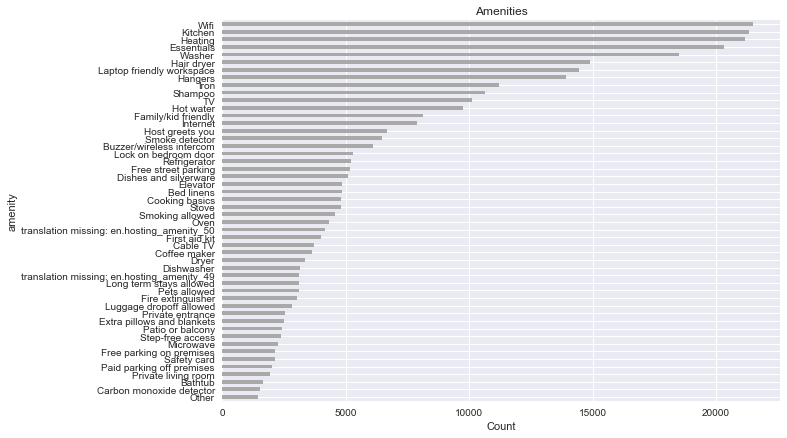

In [10]:
# create a new dataframe
sub_df = pd.DataFrame(results.most_common(50), columns=['amenity', 'count'])

# plot the Top 50
sub_df.sort_values(by=['count'], ascending=True).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='darkgrey',
                                                      title='Amenities')
plt.xlabel('Count');

#### work on reviews

In [11]:
# split the data by date
reviews.date = pd.to_datetime(reviews.date, format="%Y-%m-%d")

count_2018 = reviews[reviews["date"].isin(pd.date_range('2018-01-01', '2018-10-31'))]
count_2017 = reviews[reviews["date"].isin(pd.date_range('2017-01-01', '2017-12-31'))]
count_2016 = reviews[reviews["date"].isin(pd.date_range('2016-01-01', '2016-12-31'))]
count_2015 = reviews[reviews["date"].isin(pd.date_range('2015-01-01', '2015-12-31'))]

count_2018.loc[:,'review_count'] = 1
count_2017.loc[:,'review_count'] = 1
count_2016.loc[:,'review_count'] = 1
count_2015.loc[:,'review_count'] = 1

count_2018_monthly = count_2018.groupby([count_2018.date.dt.to_period("M"), 'listing_id'])['review_count'].agg({'review_count':{'reviews_per_month_18':'count'}}).reset_index()
count_2017_monthly = count_2017.groupby([count_2017.date.dt.to_period("M"), 'listing_id'])['review_count'].agg({'review_count':{'reviews_per_month_17':'count'}}).reset_index()
count_2016_monthly = count_2016.groupby([count_2016.date.dt.to_period("M"), 'listing_id'])['review_count'].agg({'review_count':{'reviews_per_month_16':'count'}}).reset_index()
count_2015_monthly = count_2015.groupby([count_2015.date.dt.to_period("M"), 'listing_id'])['review_count'].agg({'review_count':{'reviews_per_month_15':'count'}}).reset_index()


count_2018_monthly.columns = ['date', 'listing_id', 'reviews_per_month_18']
count_2017_monthly.columns = ['date', 'listing_id', 'reviews_per_month_17']
count_2016_monthly.columns = ['date', 'listing_id', 'reviews_per_month_16']
count_2015_monthly.columns = ['date', 'listing_id', 'reviews_per_month_15']

count_2018_monthly.set_index('date', inplace=True)
count_2017_monthly.set_index('date', inplace=True)
count_2016_monthly.set_index('date', inplace=True)
count_2015_monthly.set_index('date', inplace=True)

/home/rodolphe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/rodolphe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/rodolphe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use     

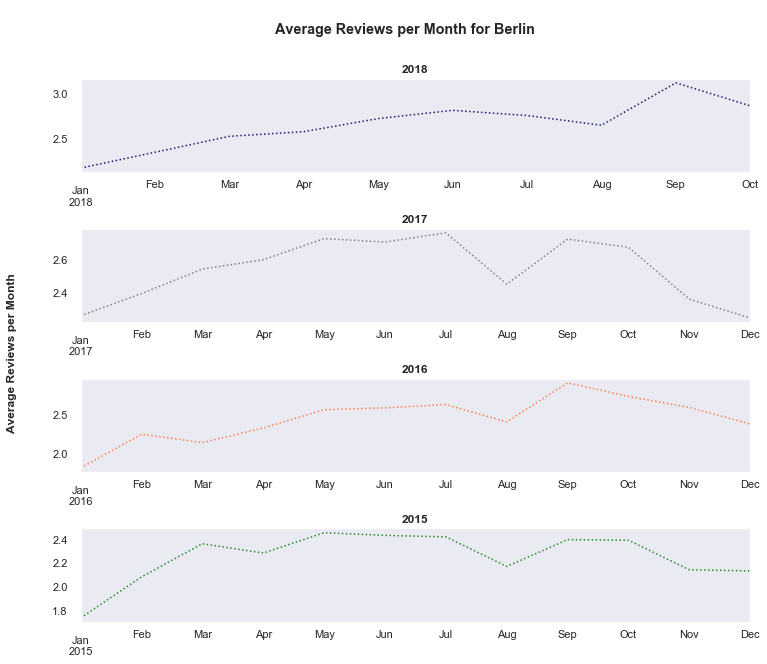

In [12]:
sns.set(style="dark")
fig, axes = plt.subplots(4, 1, figsize=(12,10))

sub_1 = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
sub_1.plot(ax=axes[0], color='midnightblue', style=':')
axes[0].set_title('2018', fontweight='bold')
axes[0].set_xlabel('') 

sub_2 = count_2017_monthly.groupby('date')['reviews_per_month_17'].mean()
sub_2.plot(ax=axes[1], color='grey', style=':')
axes[1].set_title('2017', fontweight='bold')
axes[1].set_xlabel('') 

sub_3 = count_2016_monthly.groupby('date')['reviews_per_month_16'].mean()
sub_3.plot(ax=axes[2], color='coral', style=':')
axes[2].set_title('2016', fontweight='bold')
axes[2].set_xlabel('') 

sub_4 = count_2015_monthly.groupby('date')['reviews_per_month_15'].mean()
sub_4.plot(ax=axes[3], color='forestgreen', style=':')
axes[3].set_title('2015', fontweight='bold')
axes[3].set_xlabel('') 

# adjust space between subplots and set a title
plt.subplots_adjust(hspace = 0.6)
plt.suptitle('\nAverage Reviews per Month for Berlin\n', fontweight='bold')

# plot common y-label
fig.text(0.04, 0.5, 'Average Reviews per Month', fontweight='bold', va='center', rotation='vertical');

We see that there are more people during the April-October period and that it is in January that we have the least number of people.



We do not have precise data on the length of stay for each review 

Starting from the Postula that the average stay is 3.5 days.

with this information, we can guess on the number of days a reservation is rented and know the monthly income of each rental. 

## Verify Data Quality 
### Data Quality Report

For each database we will check the percentage of missing data for each feature.

so we can know which feature is usable for the model. 

In [13]:
# value NaN in database 
def print_nan_database(database):
    NanCol = []
    for x in database.columns.values:
        if database[x].isna().sum()>0:
            NanCol.append((x, "pourcentage : {}".format(round(database[x].isna().sum()/database.shape[0]*100, 2))))

    print("Features that contain nulls;  \n\n")

    for x in NanCol:
        print(x)

#### working listing_summary

In [14]:
print_nan_database(listing_summary)
# ... and duplicates
print("\nIt contains {} duplicates.".format(listing_summary.duplicated().sum()))

Features that contain nulls;  


('name', 'pourcentage : 0.26')
('summary', 'pourcentage : 4.27')
('space', 'pourcentage : 37.83')
('description', 'pourcentage : 0.9')
('neighborhood_overview', 'pourcentage : 48.83')
('notes', 'pourcentage : 68.01')
('transit', 'pourcentage : 42.2')
('access', 'pourcentage : 51.95')
('interaction', 'pourcentage : 53.86')
('house_rules', 'pourcentage : 49.23')
('thumbnail_url', 'pourcentage : 100.0')
('medium_url', 'pourcentage : 100.0')
('xl_picture_url', 'pourcentage : 100.0')
('host_name', 'pourcentage : 0.12')
('host_since', 'pourcentage : 0.12')
('host_location', 'pourcentage : 0.51')
('host_about', 'pourcentage : 50.39')
('host_response_time', 'pourcentage : 57.17')
('host_response_rate', 'pourcentage : 57.18')
('host_acceptance_rate', 'pourcentage : 100.0')
('host_is_superhost', 'pourcentage : 0.12')
('host_thumbnail_url', 'pourcentage : 0.12')
('host_picture_url', 'pourcentage : 0.12')
('host_neighbourhood', 'pourcentage : 22.59')
('host_listing

We will be able to remove all attributes whose nan percentage is higher than 40% in this case: 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'xl_picture_url', 'host_acceptance_rate', 'square_feet','host_acceptance_rate', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'license', 'jurisdiction_names' ne seront pas utilisé 

We can also remove reviews_per_months because we already have this data in the review database, moreover our model must be based on the example of a newcomer to the site, so it can not influence its reviews_for_months nor its score for the moment. 

In [15]:
# value NaN in database 
print_nan_database(reviews)
# ... and duplicates
print("\nIt contains {} duplicates.".format(reviews.duplicated().sum()))

Features that contain nulls;  



It contains 1242 duplicates.


In [16]:
# value NaN in database 
print_nan_database(calendar_summary)

# ... and duplicates
print("\nIt contains {} duplicates.".format(calendar_summary.duplicated().sum()))

Features that contain nulls;  


('price', 'pourcentage : 78.12')

It contains 0 duplicates.


The lack of value in the price column can be explained by the fact that the apartments are not available all year round, so there are days when the apartment is not available. 

In [17]:
calendar_summary.groupby(['listing_id'])[['price']]

#delete available
calendar_summary.drop(['available'], axis = 'columns', inplace = True)
# delete Nan 
calendar_summary.dropna(subset=['price'], inplace=True)
print("\nIt contains {} NaN.".format(calendar_summary.price.isna().sum()))



It contains 0 NaN.


In [18]:
calendar_summary.groupby(['listing_id'])[['price']].count().shape


(11764, 1)

The number of lines indicates that the number of reservations for which we have a price is 11764.

This is only 50% of the number of bookings in the listing_summary database.

It seems therefore not possible to use this database to form a price per month for each reservation.

# Data preparation 
## select Data 
### Rationale for inclusion


for the project,

To analyze the relationship between the characteristics of the house and the price, we will use the listing_summary database.

To retrieve the reservation number we will use the reviews_summary.

#### working listing_summary

In [19]:
#get important feature
get_features = ["id", "cancellation_policy", "longitude", "amenities","requires_license","instant_bookable",
                "guests_included","latitude", "extra_people","require_guest_phone_verification",
               "bathrooms","bedrooms","beds", "price", "bed_type","accommodates","host_total_listings_count","host_has_profile_pic",
               "host_identity_verified", "is_location_exact","property_type","host_is_superhost","room_type","minimum_nights"]
dataset_listings = listing_summary[get_features].copy()
print(dataset_listings.dtypes)
dataset_listings.shape

id                                    int64
cancellation_policy                  object
longitude                           float64
amenities                            object
requires_license                     object
instant_bookable                     object
guests_included                       int64
latitude                            float64
extra_people                         object
require_guest_phone_verification     object
bathrooms                           float64
bedrooms                            float64
beds                                float64
price                                object
bed_type                             object
accommodates                          int64
host_total_listings_count           float64
host_has_profile_pic                 object
host_identity_verified               object
is_location_exact                    object
property_type                        object
host_is_superhost                    object
room_type                       

(22552, 24)

## Construct data
### Derived Attributes

The following data is still in object form :
- cancellation_policy, amenities, requires_license
- instant_bookable, extra_people, require_guest_phone_verification
- price, bed_type, host_has_profile_pic, host_has_profile_pic
- host_identity_verified, is_location_exact, property_type
- host_is_superhost, room_type

so we're going to see how we can turn them into digital data

In [20]:
data_change = ["cancellation_policy", "amenities", "requires_license",
"instant_bookable", "extra_people", "require_guest_phone_verification", 
"bed_type", "host_has_profile_pic", "price", "host_has_profile_pic",
"host_identity_verified", "is_location_exact", "property_type",
"host_is_superhost", "room_type"]
# data boolean

We're going to change the boolean data contained in data change to numeric.

In [21]:
def object2bool(x):
    if x=="t" or x=="T":
        return 1.0
    elif x=="f" or x=="F":
        return 0.0
    else:
        return None


boolean_features = ["require_guest_phone_verification","host_is_superhost","host_has_profile_pic",
                    "host_identity_verified","is_location_exact","requires_license","instant_bookable"]


for x in boolean_features:
    dataset_listings[x] = dataset_listings[x].map(object2bool)

In [22]:
for x in boolean_features:
    data_change.remove(x)

data_change.remove("host_has_profile_pic")

let us take care of amenities which represents the list of goods proposed by the host in his reservation 

as seen above the list has a certain value which is generally found in all the host proposals, the rarer a property is, the more "general" properties are found in the list so we can quantify this feature by the number of properties proposed.

Let's now focus on values and extra_people which are string values that can be changed to float

In [23]:
#clean $ sign
def clean_price(x):
    if ',' in x:
        return float(x.replace(",", "").replace("$",""))
        
    else:
        return float(x.replace("$",""))

(22552, 24)

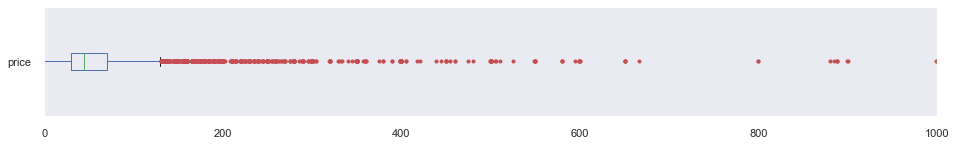

In [24]:
dataset_listings.extra_people = dataset_listings.extra_people.map(clean_price)
dataset_listings.price = dataset_listings.price.map(clean_price)
data_change.remove("extra_people")
data_change.remove("price")

red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
dataset_listings['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));
dataset_listings.shape

There is too many outleurs in this features, we will take only price below 120 dollars and we're going to remove reservations that are under 20 dollars , which makes more sense. 

In [25]:
dataset_listings.drop(dataset_listings[ (dataset_listings.price > 120) | (dataset_listings.price < 20) ].index, axis=0, inplace=True)

(20211, 24)

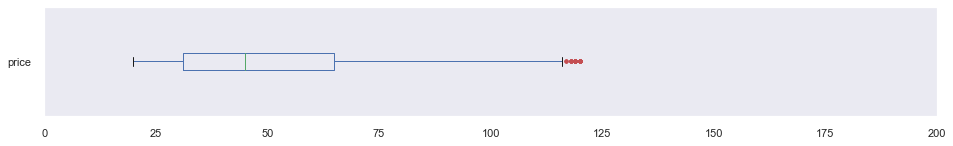

In [26]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
dataset_listings['price'].plot(kind='box', xlim=(0, 200), vert=False, flierprops=red_square, figsize=(16,2));
dataset_listings.shape

We will now focus on data with more than 2 values, 
if the number of possibilities is not too large, we will change. 

Them in a matrix form that we will add to the base.
Otherwise we will remove them. 


In [27]:
for x in data_change:
    print("feature {} has value : {}\n\n".format(x,dataset_listings[x].unique()))

feature cancellation_policy has value : ['strict_14_with_grace_period' 'moderate' 'flexible' 'super_strict_30'
 'super_strict_60']


feature amenities has value : ['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}'
 '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}'
 '{Internet,Wifi,"Pets allowed","Pets live on this property",Cat(s),"Free street parking","Buzzer/wireless intercom",Heating,Washer,"Smoke detector",

In [28]:
null_col = ['bathrooms', 'bedrooms', 'beds',
            'host_total_listings_count', 'host_has_profile_pic',
           'host_identity_verified', 'host_is_superhost']
# Add the median to the feature with Nan
for x in null_col:
    med = dataset_listings[x].median()
    dataset_listings[x] = dataset_listings[x].fillna(med)
print_nan_database(dataset_listings)

Features that contain nulls;  




In [29]:
results = Counter()
dataset_listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
results.most_common(20)

[('Wifi', 19281),
 ('Kitchen', 19153),
 ('Heating', 19014),
 ('Essentials', 18222),
 ('Washer', 16594),
 ('Hair dryer', 13240),
 ('Laptop friendly workspace', 12865),
 ('Hangers', 12349),
 ('Iron', 9868),
 ('Shampoo', 9457),
 ('TV', 8777),
 ('Hot water', 8692),
 ('Family/kid friendly', 7110),
 ('Internet', 7057),
 ('Host greets you', 5995),
 ('Smoke detector', 5532),
 ('Buzzer/wireless intercom', 5500),
 ('Lock on bedroom door', 4733),
 ('Free street parking', 4719),
 ('Refrigerator', 4610)]

In [30]:
results = Counter()
dataset_listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
results.keys()
for x in results.keys():
    dataset_listings[x] = 0

salut = dataset_listings['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')
index = 0
for row in salut:
    for x in row:
        dataset_listings[x][index] = 1
    index += 1


/home/rodolphe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
dataset_listings.drop('amenities', 1, inplace = True)



property_type contains too many values to be categorized 

In [32]:
dataset_listings.drop("property_type", axis = 1)
dataset_listings.head()


,id,cancellation_policy,longitude,requires_license,instant_bookable,guests_included,latitude,extra_people,require_guest_phone_verification,bathrooms,...,Toilet paper,Smart TV,Sound system,Breakfast table,Convection oven,Netflix,Bedroom comforts,Bathroom essentials,Ceiling hoist,Kitchenette
0,2015,strict_14_with_grace_period,13.402557,1.0,0.0,1,52.534537,28.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3176,strict_14_with_grace_period,13.417579,1.0,1.0,2,52.534996,20.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,3309,strict_14_with_grace_period,13.349065,1.0,0.0,1,52.498855,18.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,7071,moderate,13.415091,1.0,0.0,1,52.543157,24.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
6,14325,strict_14_with_grace_period,13.405562,1.0,0.0,1,52.547846,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data_change.remove('amenities')
for x in data_change:
    value = dataset_listings[[x]]
    value.room_type = pd.Categorical(value[x])
    del dataset_listings[x]
    dummies = pd.get_dummies(value, prefix = x)
    dataset_listings = pd.concat([dataset_listings, dummies], axis = 1)

dataset_listings.shape

/home/rodolphe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.
/home/rodolphe/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(20211, 201)

We will use the longitude and latitude of the reservation to know the distance to the center of berlin.

In [34]:
from geopy.distance import great_circle

In [35]:
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

In [36]:
dataset_listings['distance'] = dataset_listings.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)

In [37]:
dataset_listings = dataset_listings.drop(['longitude', 'latitude', 'id'], axis = 1)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


## Format Data 

## reformatted Data

We are going to cut dataset_listings in 2 pieces to have our X data which are the input data and our Y data which are our output data (the price)

In [52]:
y.reshape(-1,1)


array([[60.],
       [90.],
       [26.],
       ...,
       [85.],
       [99.],
       [45.]])

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_Y=dataset_listings.price
data_X=dataset_listings.drop(['price'], axis = 1)
X=np.array(data_X)
y=np.array(data_Y)
#y = y.reshape(-1,1)
#scaler.fit(y)
#y = scaler.transform(y)
y

array([60., 90., 26., ..., 85., 99., 45.])

# Modeling
###  Modeling Technique

we decided to use svm support vector machine for our project, 
the technique used is LinearSVR, it allows to learn on large datasets (more than 10 000)

In [83]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

import numpy as np
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


# Training classifiers
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neural_network import MLPRegressor
kernel = DotProduct() + WhiteKernel()

gpr = LinearRegression()

# EVALUTION

In [84]:
from sklearn.model_selection import ShuffleSplit

kf = KFold(n_splits=10)
scores = cross_val_score(gpr, X, y, cv = 10)

In [ ]:
kf = KFold(n_splits=10)
total=0
i=0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    regr = MLPRegressor(random_state=1, max_iter=500)
    regr.fit(X_train, y_train)
    pred=regr.predict(X_test)
    diff=pred-y_test
    mean = np.mean(diff)
    print("average error for kfold number " + str(i) + ": " + str(mean))
    total += mean
    i+=1
    test555 = mean_squared_error(y_test, pred)
    print("RMSE : {}\n\n".format(test555))
    
    
print("average error :" + str(total / 10))


We can see our average error is -5.42€, which is respectable but we can still see a big difference between our prediction and the truth despite the fact that we have removed apartments that cost more than 120€.

This is explainable because the price does not only depend on the data we used (geography, characteristics...), for example an apartment with a beautiful decoration will be necessarily more expensive than a simple apartment without decoration. There is too much non-quantifiable data to take into account so our system is correct for a normal apartment and still gives us an idea of the price, it is up to the user to see if he wants to put more or less expensive compared to the non-quantifiable data that we have not taken into account.

Moreover this application can be useful for a client, in fact, for a research made, the client can have a first idea of the price he will have to put in the rental.

the RMSE is between 296.87 et 458.67
and the average error ocile entre -7.5 et 0.9

our model doesn't seem to be converging, and average error is in any case negative we have a model that predicts results below the test values. we are probably in a case of underfitting.

# Deployement

The data we obtained can be used to get an evaluation of the price of his property when you start on airbnb.
but also with the average of comments per month over the year you can rent your property in periods that are more often requested such as July and September. 

In [ ]:
amenities = 5
requires_license = 1
instant_bookable = 1
guests_included = 1
extra_people = 10
require_guest_phone_verification = 0
bathrooms = 1
bedrooms = 2
beds = 4
accomodates = 3
host_total_listings_count = 4
host_has_profile_pic  = 1
host_identity_verified = 1
is_location_exact = 1
host_is_superhost = 1
minimum_nights = 4
cancellation = "cancellation_policy_moderate"
bed_type = "bed_type_Real Bed"
property_type = "property_type_Apartment"
room_type = "room_type_Entire home/apt"
distance =3.52234

host = [amenities, requires_license, instant_bookable, guests_included, extra_people,\
    require_guest_phone_verification, bathrooms, bedrooms, beds, accomodates, host_total_listings_count,\
    host_has_profile_pic, host_identity_verified, is_location_exact, host_is_superhost, minimum_nights, \
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0, 0, \
    distance]

host = np.array(host)
newdf = pd.DataFrame([host], columns = data_X.columns)
newdf[cancellation] = 1
newdf[bed_type] = 1
newdf[property_type] = 1
newdf[room_type] = 1
pred = np.array(newdf)

In [ ]:
regr.predict(pred)

with this price of 62 $ if our client wants to rent his apartment in September and July, he will be able to get 

In [ ]:
sl = count_2018_monthly.groupby('date')['reviews_per_month_18'].mean()
review_par_month_september = sl.iloc[8]
review_par_month_jully = sl.iloc[6]
duration_stay_berlin = 3.5
revenues_september = regr.predict(pred) * review_par_month_september * duration_stay_berlin
print(revenues_september[0])
revenues_jully = regr.predict(pred) * review_par_month_jully * duration_stay_berlin
print(revenues_jully[0])

he'll get 685 for the month of September 
and 605 in the month of July 

### dig deeper

We have the appraised price for his house, 
but there are other parameters that can influence its performance, such as the number of days rented, which can be influenced by its rating on AirBNB.